In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from rdkit import Chem

# import torch
from torch_geometric.data import Data
from torch_geometric.datasets import MoleculeNet
from torch_geometric.utils import to_networkx
from torch_geometric.nn import conv

from graph2vec.graph2vec import WeisfeilerLehmanMachine

In [2]:
dataset = MoleculeNet(root='/tmp/MoleculeNet', name='FreeSolv')

In [3]:
def plot_graph(data):
    g = to_networkx(data, to_undirected=True)
    layout = nx.spring_layout(g, seed=3)
    
    mol_labels = {
        i: {
            1: "H",
            3: "Li",
            4: "Be",
            5: "B",
            6: "C",
            7: "N",
            8: "O",
            9: "F",
            11: "Na",
            12: "Mg",
            13: "Al",
            14: "Si",
            15: "P",
            16: "S",
            17: "Cl",
            19: "K",
            20: "Ca",
        }[int(z)]
        for (i, z) in enumerate(data.x[:,0])
    }
    
    nx.draw_networkx_nodes(g, pos=layout, node_color="#CCCCCC")
    nx.draw_networkx_edges(g, pos=layout, width=2, edge_color="#666666")
    nx.draw_networkx_labels(g, pos=layout, labels=mol_labels)
    # plt.title(data.smiles)
    plt.plot()

    return (g, mol_labels)

In [4]:
mol2 = dataset.from_smiles("Cc1ccccc1")
mol1 = dataset.from_smiles("Cc1c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]")

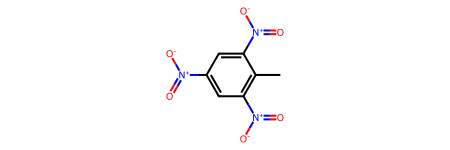

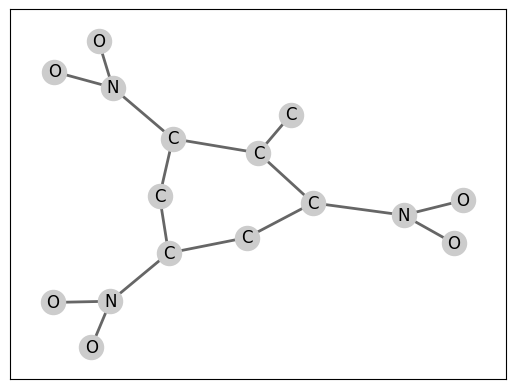

In [5]:
(g1, mol_labels1) = plot_graph(mol1)
Chem.MolFromSmiles(mol1.smiles)

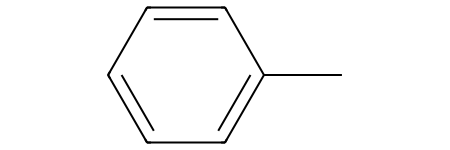

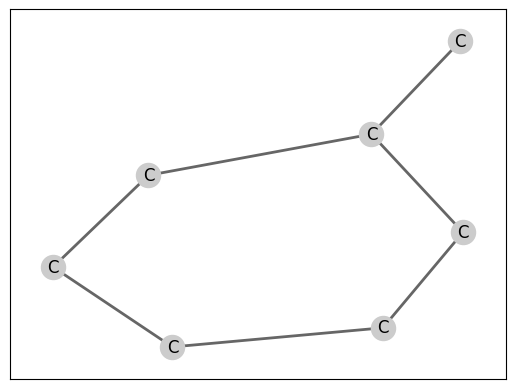

In [6]:
(g2, mol_labels2) = plot_graph(mol2)
Chem.MolFromSmiles(mol2.smiles)

In [8]:
wl = WeisfeilerLehmanMachine(g2, mol_labels2, 2)
sorted(wl.extracted_features)

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 '[C,C,C,C]',
 '[C,C,C]',
 '[C,C,C]',
 '[C,C,C]',
 '[C,C,C]',
 '[C,C,C]',
 '[C,C]',
 '[[C,C,C,C],[C,C,C],[C,C,C],[C,C]]',
 '[[C,C,C],[C,C,C,C],[C,C,C]]',
 '[[C,C,C],[C,C,C,C],[C,C,C]]',
 '[[C,C,C],[C,C,C],[C,C,C]]',
 '[[C,C,C],[C,C,C],[C,C,C]]',
 '[[C,C,C],[C,C,C],[C,C,C]]',
 '[[C,C],[C,C,C,C]]']